### Logistic Regression

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [2]:
import pandas as pd
import statsmodels.api as sm
import math
# api submodule gives access to the most commonly used 
# classes and functions directly.

2. Import Default dataset

In [3]:
default = pd.read_csv('Default (1).csv')

In [4]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [5]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [6]:
# Color dictionary
colors = {'No': 'blue', 'Yes': 'red'}
markers = {'No': 's', 'Yes': 'o'}

<Figure size 1000x600 with 0 Axes>

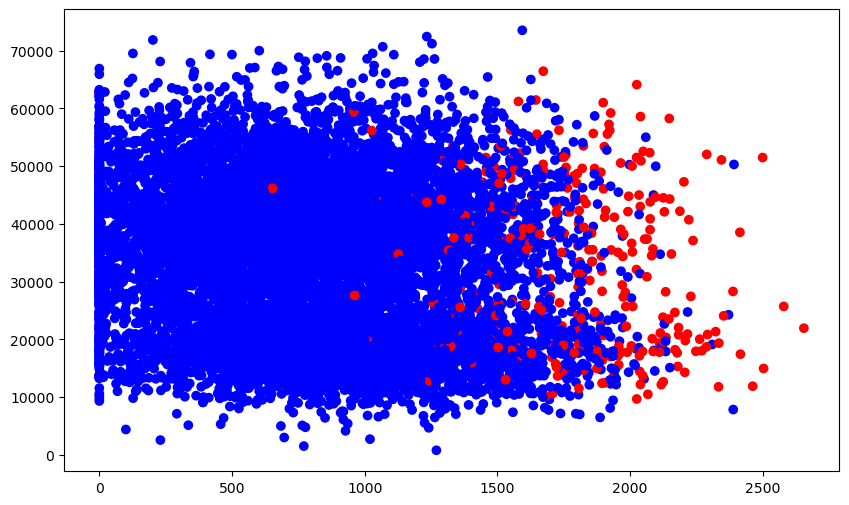

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(default['balance'], default['income'], 
            c = default['default'].map(colors))

<Axes: xlabel='balance', ylabel='income'>

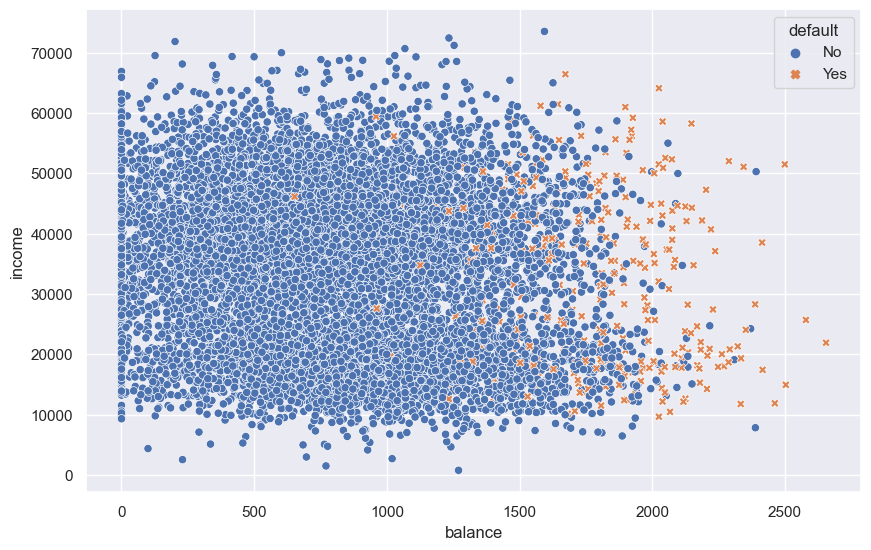

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6.27)})
sns.scatterplot(data = default, x = default['balance'], y = default['income'],
               style = default['default'], hue = default['default'])

In [9]:
import statsmodels.api as sm

# Models in statsmodels require design matrices, which mean that the data
# need to be represented in a way that is compatible with model building

# We can use patsy library to create design matrices more easily, e.g.
# create dummy variables
import patsy

y, X = patsy.dmatrices('default ~ balance + income + student',
                      data = default,
                      return_type = 'dataframe')


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   default[No]   10000 non-null  float64
 1   default[Yes]  10000 non-null  float64
dtypes: float64(2)
memory usage: 234.4 KB


In [11]:
y.head()
X.head()

,default[No],default[Yes]
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


,Intercept,student[T.Yes],balance,income
0,1.0,0.0,729.526495,44361.625074
1,1.0,1.0,817.180407,12106.134700
2,1.0,0.0,1073.549164,31767.138947
3,1.0,0.0,529.250605,35704.493935
4,1.0,0.0,785.655883,38463.495879


In [12]:
# Fit a single variable model - balance
logit_model_1 = sm.Logit(y['default[Yes]'], X[['Intercept','balance']])
logit_res_1 =  logit_model_1.fit()
logit_res_1.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                  0.4534
Time:                        20:06:59   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [13]:
b1000 = pd.DataFrame({'Intercept':[1], 'balance':[1000]})

In [14]:
b1100 = pd.DataFrame({'Intercept':[1], 'balance':[1100]})

In [15]:
b2000 = pd.DataFrame({'Intercept':[1], 'balance':[2000]})

In [16]:
logit_res_1.predict(b1000)

0    0.005752
dtype: float64

In [17]:
logit_res_1.predict(b1100)

0    0.009927
dtype: float64

In [18]:
def odds_ratio(p1,p2):
    return (p2/(1-p2))/(p1/(1-p1))

In [19]:
odds_ratio(0.005752,0.009927)

1.733112096128757

In [20]:
math.exp(0.55)

1.7332530178673953

In [21]:
logit_res_1.predict(b2000)

0    0.585769
dtype: float64

In [22]:
import math
math.exp(5.5)

244.69193226422038

In [23]:
# Fit a single variable model - student
logit_model_2 = sm.Logit(y['default[Yes]'], X[['Intercept','student[T.Yes]']])
logit_res_2 =  logit_model_2.fit()
logit_res_2.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                0.004097
Time:                        20:07:00   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

In [24]:
# Fit a full model
logit_model_3 = sm.Logit(y['default[Yes]'], X)
logit_res_3 =  logit_model_3.fit()
logit_res_3.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                  0.4619
Time:                        20:07:00   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
balance            0.0057      0.000     24.737      0.000       0.005       0.006
income          3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [25]:
# Make predictions for the dataset
predicted_p = logit_res_3.predict(X)

In [31]:
# Classification
predicted_classes = (predicted_p >= 0.5).astype(int)
predicted_classes


0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64

In [27]:
# Evaluate the classification performance

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y['default[Yes]'], predicted_classes)
conf_matrix = confusion_matrix(y['default[Yes]'], predicted_classes)
classification_report_str = classification_report(y['default[Yes]'], predicted_classes)

In [28]:
print(accuracy)
print(conf_matrix)
print(classification_report_str)

0.9732
[[9627   40]
 [ 228  105]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9667
         1.0       0.72      0.32      0.44       333

    accuracy                           0.97     10000
   macro avg       0.85      0.66      0.71     10000
weighted avg       0.97      0.97      0.97     10000



In [29]:
# Change the base case
y, X = patsy.dmatrices('default ~ balance + income + C(student,Treatment(reference = "Yes"))',
                      data = default,
                      return_type = 'dataframe')